<a href="https://colab.research.google.com/github/Mubashar-Bashir/Langchain_EcoSystem/blob/main/22_langchain_ecosystem/langgraph/course-notebooks/module-1/2.1_tools_messages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Actions and Structure Messages

## Review

We built a simple graph with nodes, normal edges, and conditional edges.

## Goals

Now, let's understand the power of Actions with AI Models and before that structure our prompts.

## Messages

Chat models can use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages), which capture different roles within a conversation.

LangChain supports various message types, including `HumanMessage`, `AIMessage`, `SystemMessage`, and `ToolMessage`.

These represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call.

Let's create a list of messages.

Each message can be supplied with a few things:

* `content` - content of the message
* `name` - optionally, a message author
* `response_metadata` - optionally, a dict of metadata (e.g., often populated by model provider for `AIMessages`)

In [3]:
%pip install -q U langchain
%pip install -q U langchain-google-genai

In [5]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [AIMessage(content=f"So you said you were researching on Langchain", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right LangChain using Langcahin_core.messages",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best practice to use these messages in list.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching on Langchain
================================ Human Message =================================
Name: Lance

Yes, that's right LangChain using Langcahin_core.messages
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best practice to use these messages in list.


From now let's use HumanMessage to pass our Prompt to Model

In [6]:
from google.colab import userdata
gemini_api_key = userdata.get('Gemini-key')


In [7]:
%pip install --quiet -U langchain-google-genai

In [8]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

In [9]:
simple_call = llm.invoke("Hi")
print(simple_call)

content='Hi! How can I help you today? \n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-9b231f4b-e63f-4b97-9d91-896be14a3e49-0' usage_metadata={'input_tokens': 2, 'output_tokens': 10, 'total_tokens': 12}


In [17]:
messages = [HumanMessage(content="What is your name?")]
result = llm.invoke(messages)
pprint(result)

AIMessage(content="I am a large language model, so I don't have a name in the traditional sense. You can call me Bard, or anything you like! \n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-ec427c1f-fdca-4ea9-a632-abc88db4213b-0', usage_metadata={'input_tokens': 6, 'output_tokens': 31, 'total_tokens': 37})


In [18]:
system_human_message = [
                SystemMessage(content="You are a helpful assistant! Your name is Bob."),
                HumanMessage(content="What is your name?")
            ]
result = llm.invoke(system_human_message)
pprint(result)



AIMessage(content='Hi there! My name is Bob. 😊  What can I do for you today? \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-76b73b70-f9b0-479d-a53f-51325e45a90b-0', usage_metadata={'input_tokens': 17, 'output_tokens': 18, 'total_tokens': 35})


In [19]:
context_call = llm.invoke(messages)
pprint(context_call.content)

("I am a large language model, so I don't have a name. You can call me Bard, "
 'or anything else you like! \n')


## Tools

Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language.

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user.

And, it will return an output that adheres to the tool's schema.

[Many LLM providers support tool calling](https://python.langchain.com/v0.1/docs/integrations/chat/) and [tool calling interface](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) in LangChain is simple.

You can simply pass any Python `function` into `ChatModel.bind_tools(function)`.

![Screenshot 2024-08-19 at 7.46.28 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dc1c17a7a57f9960_chain2.png)

In [20]:
%%capture --no-stderr
%pip install --quiet -U langchain-google-genai langchain_core langgraph

In [ ]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

## Tool Calling

In [21]:
print("\n\nllm\n", llm, "\n\n\n")



llm
 model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7c8248b96050> default_metadata=() 





In [22]:
def deposit_money(name: str, bank_account_no: int) -> int:
    """Deposit Money in Bank account.

    Args:
        name: first str
        bank_account_no: second int
    """
    # BUSINESS LOGIC for Bank Deposit
    # ......
    return {"status": f"Deposit Successfule in {name} Account {bank_account_no}"}

In [23]:
llm_with_tools = llm.bind_tools([deposit_money])

In [24]:

# ## Tool Calling
print("\n\nllm\n", llm, "\n\n\n")
def deposit_money(name: str, bank_account_no: int) -> int:
    """Deposit Money in Bank account.

    Args:
        name: first str
        bank_account_no: second int
    """
    # BUSINESS LOGIC for Bank Deposit
    # ......
    return {"status": f"Deposit Successfule in {name} Account {bank_account_no}"}

from langchain.tools import tool

@tool
def deposit_money_tool(name: str, bank_account_no: int) -> int:
    """Deposit Money in Bank account.

    Args:
        name: first str
        bank_account_no: second int
    """
    # BUSINESS LOGIC for Bank Deposit
    # ......
    return {"status": f"Deposit Successfule in {name} Account {bank_account_no}"}

llm_with_tools = llm.bind_tools([deposit_money_tool])




llm
 model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7c8248b96050> default_metadata=() 





In [25]:
llm_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7c8248b96050>, default_metadata=()), kwargs={'tools': [{'function_declarations': [{'name': 'deposit_money_tool', 'description': 'Deposit Money in Bank account.\n\n    Args:\n        name: first str\n        bank_account_no: second int', 'parameters': {'type_': 6, 'description': 'Deposit Money in Bank account.\n\nArgs:\n    name: first str\n    bank_account_no: second int', 'properties': {'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'bank_account_no': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['name', 'bank_account_no'], 'format_'

In [26]:
from langchain_core.messages import HumanMessage

In [27]:
call = llm.invoke(
    [HumanMessage(content=f"Deposit Money in Ahmad Account. His acc number is 00123", name="Muhammad")])
call


AIMessage(content="I understand you want to deposit money into Ahmad's account. However, I can't do that. I'm a language model and don't have access to real-world bank accounts. \n\nTo deposit money into Ahmad's account, you'll need to:\n\n* **Know the full account number and bank details:** This includes the bank name, branch, and any other necessary information.\n* **Use a secure method of deposit:** This could be online banking, a mobile app, a bank teller, an ATM, or a wire transfer. \n\nPlease note that you should **never share your own or someone else's bank account details with anyone online unless you are on a trusted and secure website or platform**. \n\nIf you have further questions, I recommend contacting the bank directly. \n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'categ

In [28]:
call = llm_with_tools.invoke(
    [HumanMessage(content=f"Deposit Money in Ahmad Account. His acc number is 00123", name="Muhammad")])
call

{'name': 'deposit_money_tool', 'description': 'Deposit Money in Bank account.\n\n    Args:\n        name: first str\n        bank_account_no: second int', 'parameters': {'type_': 6, 'description': 'Deposit Money in Bank account.\n\nArgs:\n    name: first str\n    bank_account_no: second int', 'properties': {'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'bank_account_no': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['name', 'bank_account_no'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money_tool', 'arguments': '{"name": "Ahmad", "bank_account_no": 123.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-7e84862c-2e18-4728-a2a9-f437bb0f38b1-0', tool_calls=[{'name': 'deposit_money_tool', 'args': {'name': 'Ahmad', 'bank_account_no': 123.0}, 'id': '96cac24b-7da9-4740-a4dd-4b2b692111ce', 'type': 'tool_call'}], usage_metadata={'input_tokens': 96, 'output_tokens': 28, 'total_tokens': 124})

### Building Graph

In [29]:
# We have an LLM Capable of Tool Calling: using bind_tools

# Now Lets do the Orchestration Through LangGraph

# 0.  State

from typing_extensions import TypedDict

class LlmWithToolSState(TypedDict):
  messages: list

# 1. tool calling llm ki Node

def call_llm(state: LlmWithToolSState):
  messages = state["messages"]
  call_response = llm_with_tools.invoke(messages)
  # messages.append(call_response)

  # return {"messages": messages}
  return {"messages": [call_response]}

# 2. Graph

from langgraph.graph import StateGraph, START, END

builder: StateGraph = StateGraph(LlmWithToolSState)

# define nodes
builder.add_node("call_llm_with_tools", call_llm)

# define edges
builder.add_edge(START, "call_llm_with_tools")
builder.add_edge("call_llm_with_tools", END)

# build graph
graph = builder.compile()


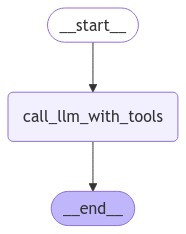

In [30]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
graph.invoke({"messages": [HumanMessage(content="Hi")]})

{'name': 'deposit_money_tool', 'description': 'Deposit Money in Bank account.\n\n    Args:\n        name: first str\n        bank_account_no: second int', 'parameters': {'type_': 6, 'description': 'Deposit Money in Bank account.\n\nArgs:\n    name: first str\n    bank_account_no: second int', 'properties': {'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'bank_account_no': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['name', 'bank_account_no'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


{'messages': [AIMessage(content='Hi! How can I help you today? 😊 \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-f1d5ca8b-ca25-4b5c-9260-0c10040cae5e-0', usage_metadata={'input_tokens': 81, 'output_tokens': 10, 'total_tokens': 91})]}

In [32]:
graph.invoke({"messages": [HumanMessage(content="Deposiut 7000 in Ahmad Account - his bank num is 001")]})

{'name': 'deposit_money_tool', 'description': 'Deposit Money in Bank account.\n\n    Args:\n        name: first str\n        bank_account_no: second int', 'parameters': {'type_': 6, 'description': 'Deposit Money in Bank account.\n\nArgs:\n    name: first str\n    bank_account_no: second int', 'properties': {'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'bank_account_no': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['name', 'bank_account_no'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money_tool', 'arguments': '{"name": "Ahmad", "bank_account_no": 1.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-a1077d84-040b-4985-a7c8-b7220f3d723a-0', tool_calls=[{'name': 'deposit_money_tool', 'args': {'name': 'Ahmad', 'bank_account_no': 1.0}, 'id': 'ad95e215-2179-4861-92de-0e1c41167d6d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 100, 'output_tokens': 26, 'total_tokens': 126})]}

#### Current Flow

- LLM: Call this Tool
- System: Called Tool and told LLM the result.

#### Issue ??: Where is my Human Message

Right now in response we only have AIMessage

#### Solutions:

- Proposal 1: manually Add Messages in call_llm using llm
- Proposal 2: Reducer Functions to Keep History Context